<a href="https://colab.research.google.com/github/pranalid2639-sketch/first-repository/blob/main/Cognifyz_LEVEL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LEVEL 1-Task 1**


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv("/content/Dataset _cognifyz.csv")


In [4]:
print("ROWS:",len(df))
print("COLUMNS:",df.shape[1])

ROWS: 9551
COLUMNS: 21


**Top Cuisines**

In [5]:
cuisine_series = df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])
cuisine_counts = Counter([cuisine for sublist in cuisine_series for cuisine in sublist])

top_cuisines = cuisine_counts.most_common(3)
print("Top 3 Cuisines:", top_cuisines)

total_restaurants = len(df)
percentages = {cuisine: (df['Cuisines'].str.contains(cuisine, na=False).sum() / total_restaurants) * 100
               for cuisine, _ in top_cuisines}
percentages

Top 3 Cuisines: [('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]


{'North Indian': np.float64(41.461627054758665),
 'Chinese': np.float64(28.614804732488746),
 'Fast Food': np.float64(20.804104282274107)}

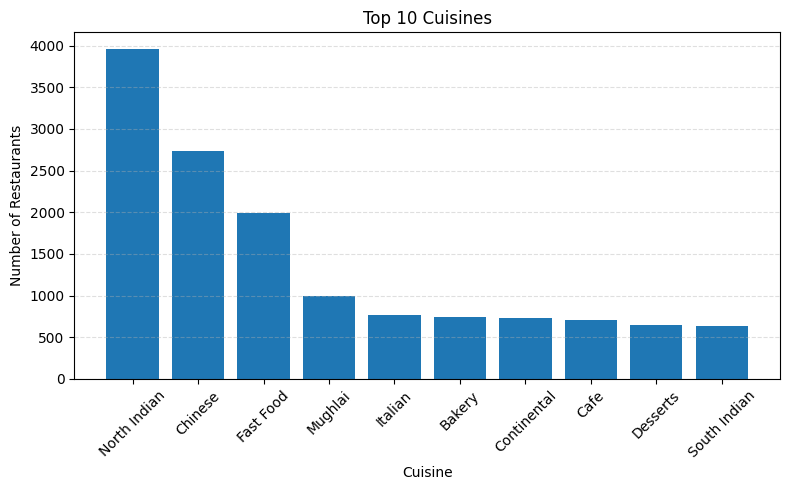

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

cuisine_series = df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])
cuisine_counts = Counter([cuisine for sublist in cuisine_series for cuisine in sublist])

top_n = 10

result = pd.DataFrame(cuisine_counts.most_common(top_n), columns=['Cuisine', 'Count'])

plt.figure(figsize=(8,5))
plt.bar(result['Cuisine'], result['Count'])
plt.title(f"Top {top_n} Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**LEVEL 1-Task 2**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset _cognifyz.csv")



In [9]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

**City with the Highest Number of Restaurants**

In [15]:
city_counts = df['City'].value_counts()

city_counts.head(10)


,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Lucknow,21
Ahmedabad,21
Amritsar,21


City with the highest number of restaurants: New Delhi


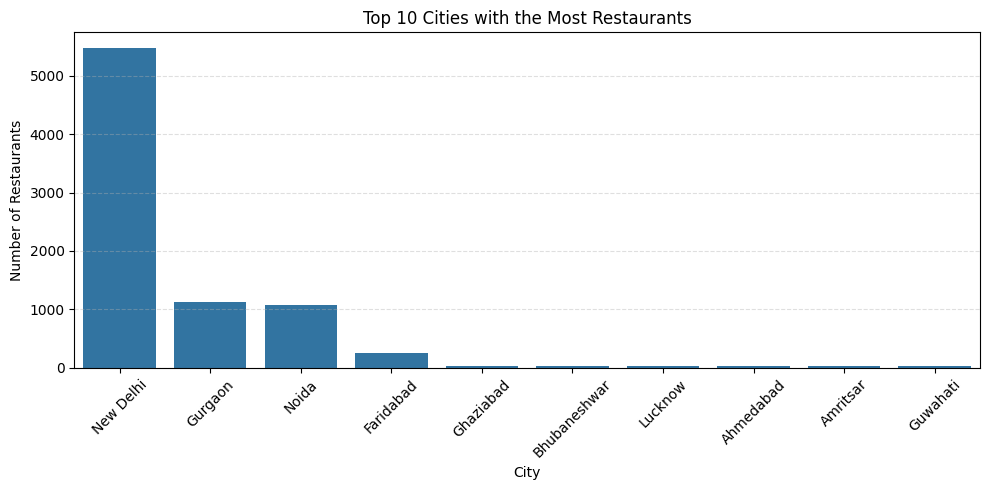

In [11]:
top_city = city_counts.idxmax()
print("City with the highest number of restaurants:", top_city)

plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.head(10).index, y=city_counts.head(10).values)
plt.title("Top 10 Cities with the Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Average rating per city**

In [12]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
city_avg_rating.head(10)


,Aggregate rating
City,
Inner City,4.900000
Quezon City,4.800000
Makati City,4.650000
Pasig City,4.633333
Mandaluyong City,4.625000
Beechworth,4.600000
London,4.535000
Taguig City,4.525000
Secunderabad,4.500000


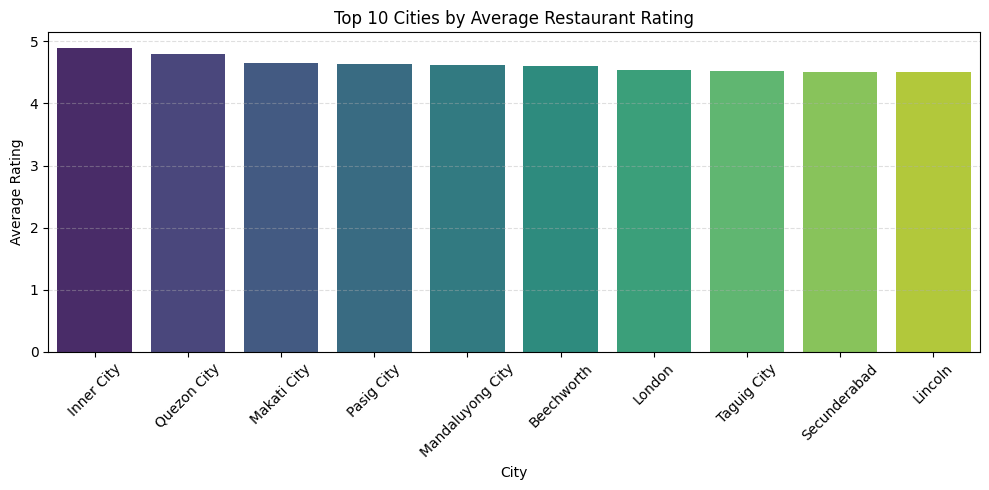

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=city_avg_rating.head(10).index,
    y=city_avg_rating.head(10).values,
    hue=city_avg_rating.head(10).index,
    palette='viridis',
    legend=False
)
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



**Find City with Highest Average Rating**

In [16]:
best_city = city_avg_rating.idxmax()
best_rating = city_avg_rating.max()
print(f"City with the highest average rating: {best_city} ({best_rating:.2f})")


City with the highest average rating: Inner City (4.90)


In [20]:
top5_counts = city_counts.head(5)
top5_avg = city_avg_rating[top5_counts.index]

comparison_df = pd.DataFrame({
    'City': top5_counts.index,
    'Restaurant Count': top5_counts.values,
    'Average Rating': top5_avg.values
})
comparison_df


,City,Restaurant Count,Average Rating
0,New Delhi,5473,2.438845
1,Gurgaon,1118,2.651431
2,Noida,1080,2.036204
3,Faridabad,251,1.866932
4,Ghaziabad,25,2.852000


**LEVEL 1-Task 3**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset _cognifyz.csv")

In [26]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

**Count the Number of Restaurants per Price Range**

In [27]:
price_counts = df['Price range'].value_counts().sort_index()

print("Number of restaurants in each price range:")
print(price_counts)

Number of restaurants in each price range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


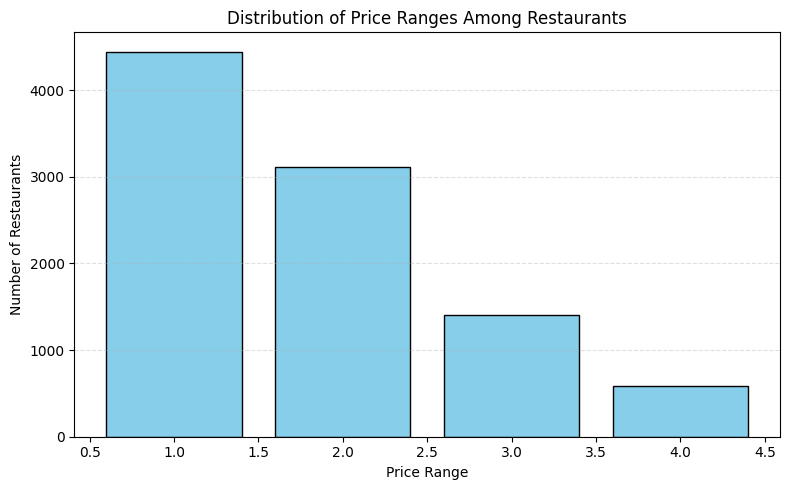

In [28]:
plt.figure(figsize=(8,5))
plt.bar(price_counts.index, price_counts.values, color='skyblue', edgecolor='black')
plt.title("Distribution of Price Ranges Among Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Calculate Percentage of Restaurants in Each Price Range**

In [29]:
price_percentage = (price_counts / len(df)) * 100

print("Percentage of restaurants in each price range:")
print(price_percentage.round(2))

Percentage of restaurants in each price range:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


**LEVEL 1-Task 4**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset _cognifyz.csv")

df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

**Calculate Percentage of Restaurants Offering Online Delivery**

In [31]:
online_delivery_counts = df['Has Online delivery'].value_counts()
online_delivery_percentage = (online_delivery_counts / len(df)) * 100

print("Number of Restaurants (Online Delivery):")
print(online_delivery_counts)
print("\nPercentage of Restaurants (Online Delivery):")
print(online_delivery_percentage.round(2))


Number of Restaurants (Online Delivery):
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

Percentage of Restaurants (Online Delivery):
Has Online delivery
No     74.34
Yes    25.66
Name: count, dtype: float64


**Compare Average Ratings (Online vs. Offline)**

In [32]:
ratings_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("Average Ratings:")
print(ratings_comparison)


Average Ratings:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


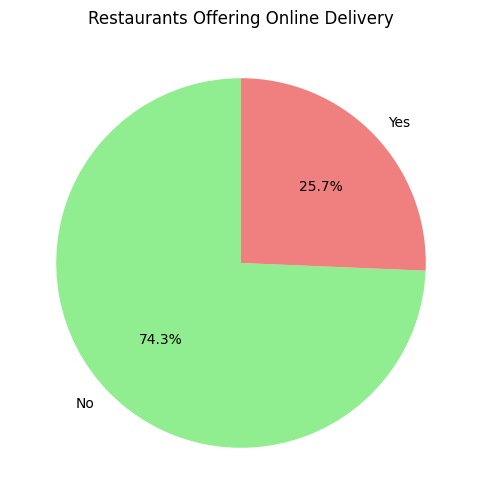

In [33]:
plt.figure(figsize=(6,6))
plt.pie(
    online_delivery_counts,
    labels=online_delivery_counts.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    startangle=90
)
plt.title("Restaurants Offering Online Delivery")
plt.show()


/tmp/ipython-input-1327858752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


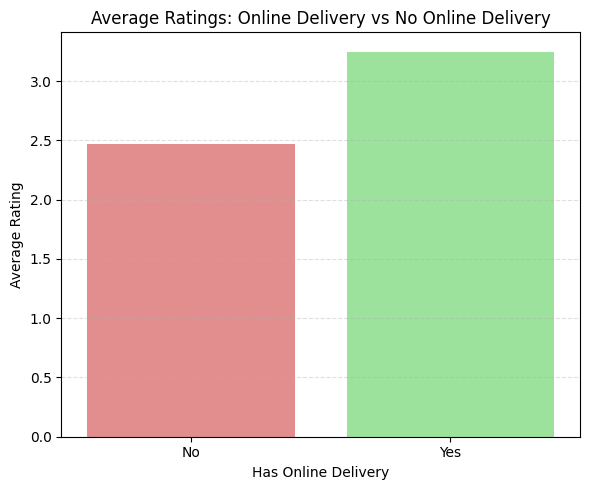

In [34]:
plt.figure(figsize=(6,5))
sns.barplot(
    x=ratings_comparison.index,
    y=ratings_comparison.values,
    palette=['lightcoral', 'lightgreen']
)
plt.title("Average Ratings: Online Delivery vs No Online Delivery")
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Rating")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
